# Homework

In [1]:
# Handy imports from class
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal
from datetime import datetime   #<--- need this to get the datetime column over to an actual datetime

df = pd.read_csv('weather/temperature.csv')
df.head()


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


### 1. Write a function that efficiently converts every column to a different temperature scale

In [2]:
# My original Farenheit function - which meant I had to re-add the datetime column

def to_farenheit(K):
    return (K * 1.8) - 459.67

# A manual push of columns
df_farenheit = df[['Vancouver','Portland','San Francisco','Seattle','Los Angeles','San Diego','Las Vegas','Phoenix',
                'Albuquerque','Denver','San Antonio','Dallas','Houston','Kansas City','Minneapolis','Saint Louis',
                'Chicago','Nashville','Indianapolis','Atlanta','Detroit','Jacksonville','Charlotte', 'Miami','Pittsburgh',
                'Toronto','Philadelphia','New York','Montreal','Boston','Beersheba','Tel Aviv District','Eilat','Haifa',
                'Nahariyya','Jerusalem']].apply(to_farenheit)

# Oooops! Have to put back the date-time columns by copyting it from the original df
df_farenheit['datetime'] = df['datetime'].values

# Had to move date-time from last to first column
cols = list(df_farenheit.columns)
cols = [cols[-1]] + cols[:-1]
df_farenheit = df_farenheit[cols]

df_farenheit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          44458 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      44460 non-null  float64
 4   Seattle            45250 non-null  float64
 5   Los Angeles        45250 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45252 non-null  float64
 8   Phoenix            45250 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45249 non-null  float64
 13  Houston            45250 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45240 non-null  float64
 16  Saint Louis        452

In [3]:
# A second go, this time trying lambda, inspired by Lilli Barko - no need to worry about the datetime column

df_farenheit2= df.apply(lambda x: (x * 1.8) - 459.67 if x.name != 'datetime' else x)
df_farenheit2.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
1,2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2,2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
3,2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
4,2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63


### 2. Write a function that efficiently fills in missing values in every column, except for trailing NANs.  

That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end

In [4]:
# Need to get day number to use later in grouping

df_farenheit['day_number'] = pd.to_datetime(df_farenheit['datetime']).dt.strftime("%j")

# Interpolation fills in the missing values with a method of linear, meaning that it's averaging amounts before and after
# the NaN area, limit_direction means that it's only moving forwards in its calculations, while the axis of 0 means it's
# going in the order of columns

farenheit = df_farenheit.interpolate(method='linear', limit_direction='forward', axis=0)

farenheit.head() 

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,day_number
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN,275
1,2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63,275
2,2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63,275
3,2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63,275
4,2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63,275


In [6]:
df_farenheit2['day_number'] = pd.to_datetime(df_farenheit2['datetime']).dt.strftime("%j")

farenheit2 = df_farenheit2.interpolate(method='linear', limit_direction='forward', axis=0)

farenheit2.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,day_number
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN,275
1,2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63,275
2,2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63,275
3,2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63,275
4,2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63,275


In [7]:
farenheit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          45252 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      45252 non-null  float64
 4   Seattle            45252 non-null  float64
 5   Los Angeles        45252 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45252 non-null  float64
 8   Phoenix            45252 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45252 non-null  float64
 13  Houston            45252 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45252 non-null  float64
 16  Saint Louis        452

In [8]:
farenheit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          45252 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      45252 non-null  float64
 4   Seattle            45252 non-null  float64
 5   Los Angeles        45252 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45252 non-null  float64
 8   Phoenix            45252 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45252 non-null  float64
 13  Houston            45252 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45252 non-null  float64
 16  Saint Louis        452

### 3. Find cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average

In [66]:
# Get only min and max for each city
city = []
lowest = []
highest = []
difference = []
mean = []

for column in farenheit:
    if column != 'datetime' and column != 'day_number':
        city.append(column)
        lowest.append(farenheit[column].min())
        highest.append(farenheit[column].max())
        difference.append(farenheit[column].max() - farenheit[column].min())
        mean.append(farenheit[column].mean())
                

# Create a dataframe from the lists, by zipping them and naming columnsg
min_max_df = pd.DataFrame(list(zip(city, lowest, highest, difference, mean)),
               columns =['City', 'Min', 'Max', 'Difference','Mean'])

In [68]:
# Sorting by the difference of range between the lowest low and the highest high
min_max_df.sort_values(by=['Mean'])

,City,Min,Max,Difference,Mean
28,Montreal,-21.7300,94.514,116.2440,44.946694
14,Minneapolis,-23.4640,95.162,118.6260,45.580430
25,Toronto,-14.5300,93.434,107.9640,47.824233
9,Denver,-13.7602,105.080,118.8402,49.440932
20,Detroit,-21.4000,94.820,116.2200,49.679002
16,Chicago,-11.6680,95.594,107.2620,50.360746
29,Boston,-10.4980,94.730,105.2280,51.132626
0,Vancouver,-18.4000,92.930,111.3300,51.413013
24,Pittsburgh,-10.7092,91.652,102.3612,51.626559
3,Seattle,15.1340,93.470,78.3360,52.268637


In [71]:
# Sorting by the difference of range between the lowest low and the highest high
min_max_df.sort_values(by=['Min'])

,City,Min,Max,Difference,Mean
14,Minneapolis,-23.4640,95.162,118.6260,45.580430
28,Montreal,-21.7300,94.514,116.2440,44.946694
20,Detroit,-21.4000,94.820,116.2200,49.679002
18,Indianapolis,-18.9106,102.002,120.9126,52.922336
0,Vancouver,-18.4000,92.930,111.3300,51.413013
25,Toronto,-14.5300,93.434,107.9640,47.824233
9,Denver,-13.7602,105.080,118.8402,49.440932
16,Chicago,-11.6680,95.594,107.2620,50.360746
24,Pittsburgh,-10.7092,91.652,102.3612,51.626559
29,Boston,-10.4980,94.730,105.2280,51.132626


In [69]:
# Sorting by the difference of range between the lowest low and the highest high
min_max_df.sort_values(by=['Max'])

,City,Min,Max,Difference,Mean
24,Pittsburgh,-10.7092,91.652,102.3612,51.626559
0,Vancouver,-18.4000,92.930,111.3300,51.413013
25,Toronto,-14.5300,93.434,107.9640,47.824233
3,Seattle,15.1340,93.470,78.3360,52.268637
28,Montreal,-21.7300,94.514,116.2440,44.946694
29,Boston,-10.4980,94.730,105.2280,51.132626
26,Philadelphia,-8.9680,94.730,103.6980,54.002514
20,Detroit,-21.4000,94.820,116.2200,49.679002
14,Minneapolis,-23.4640,95.162,118.6260,45.580430
16,Chicago,-11.6680,95.594,107.2620,50.360746


In [70]:
# Sorting by the difference of range between the lowest low and the highest high
min_max_df.sort_values(by=['Difference'])

,City,Min,Max,Difference,Mean
23,Miami,35.7500,95.954,60.2040,77.039693
2,San Francisco,30.4700,104.846,74.3760,59.448823
21,Jacksonville,23.8280,98.600,74.7720,70.130084
30,Beersheba,30.2522,107.006,76.7538,64.893098
3,Seattle,15.1340,93.470,78.3360,52.268637
35,Jerusalem,31.6832,111.002,79.3188,68.092081
34,Nahariyya,23.9576,104.000,80.0424,69.865398
12,Houston,21.9560,103.568,81.6120,69.897584
5,San Diego,18.7400,104.378,85.6380,62.717079
10,San Antonio,17.4200,104.918,87.4980,69.144163


### 4. For the two cities you found in for problem 4 (there are many possible answers), clean up the data via aggregation or rolling averages and plot a clear visual

In [73]:
# Need minimum and maximum for each day

im_df = farenheit[['day_number','Phoenix','Miami']]

im_df.sort_values(by=['day_number'])

,day_number,Phoenix,Miami
37272,001,53.960,68.936
37263,001,57.200,72.716
37262,001,58.568,72.500
37261,001,58.766,71.798
37260,001,60.350,72.716
...,...,...,...
37256,366,60.134,75.416
37257,366,60.800,75.200
37258,366,61.070,75.200
37249,366,53.600,52.718


In [78]:
# Grouping by DAY NUMBER to get the min and max for each day

min_pm_df = im_df.groupby(['day_number']).min()

max_pm_df = im_df.groupby(['day_number']).max()

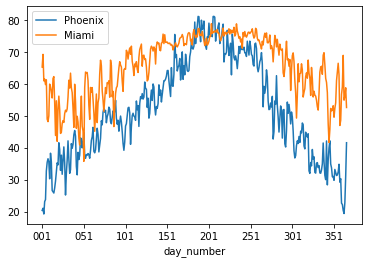

In [82]:
lines = min_pm_df.plot.line()

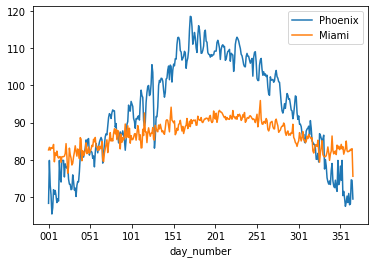

In [83]:
lines2 = max_pm_df.plot.line()